# TITANIC SURVIVAL PREDICTION WITH LOGISTIC REGRESSION

Logistic Regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.


# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [270]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#### THE DATA

In [271]:
titanic_train = pd.read_csv('titanic_train.csv')

In [272]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

#### Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

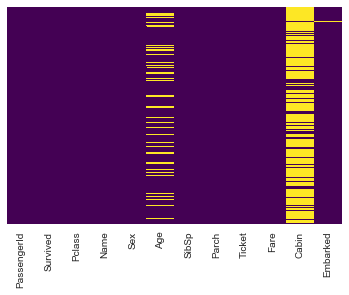

In [273]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! 

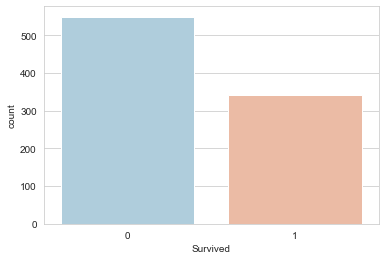

In [274]:
sns.set_style("whitegrid") 
sns.countplot(x="Survived", data=titanic_train, palette='RdBu_r')

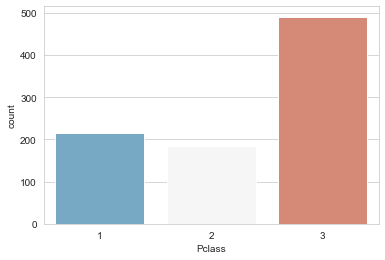

In [275]:
sns.set_style("whitegrid") 
sns.countplot(x="Pclass", data=titanic_train, palette='RdBu_r')

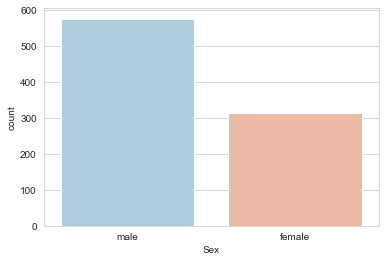

In [276]:
sns.set_style("whitegrid") 
sns.countplot(x="Sex", data=titanic_train, palette='RdBu_r')

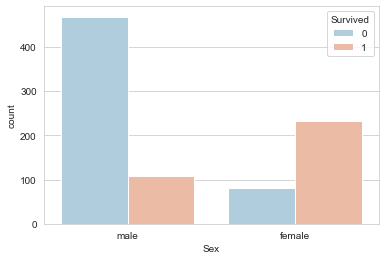

In [277]:
sns.set_style("whitegrid") 
sns.countplot(x="Sex", hue='Survived', data=titanic_train, palette='RdBu_r')

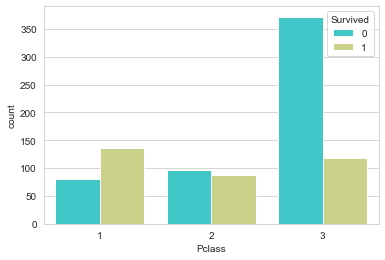

In [278]:
sns.set_style("whitegrid") 
sns.countplot(x="Pclass", hue='Survived', data=titanic_train, palette='rainbow')

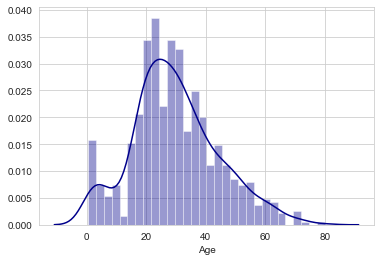

In [279]:
sns.distplot(titanic_train['Age'].dropna(), bins=30, color='darkblue')

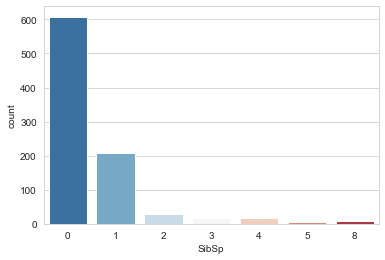

In [280]:
sns.set_style("whitegrid") 
sns.countplot(x="SibSp", data=titanic_train, palette='RdBu_r')

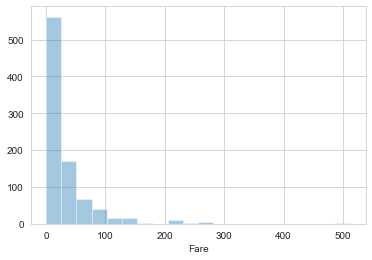

In [281]:
sns.distplot(titanic_train['Fare'], kde=False, bins=20)

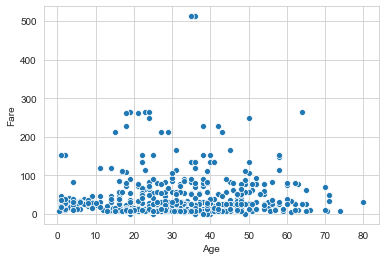

In [282]:
sns.scatterplot(data=titanic_train, x="Age", y="Fare")

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


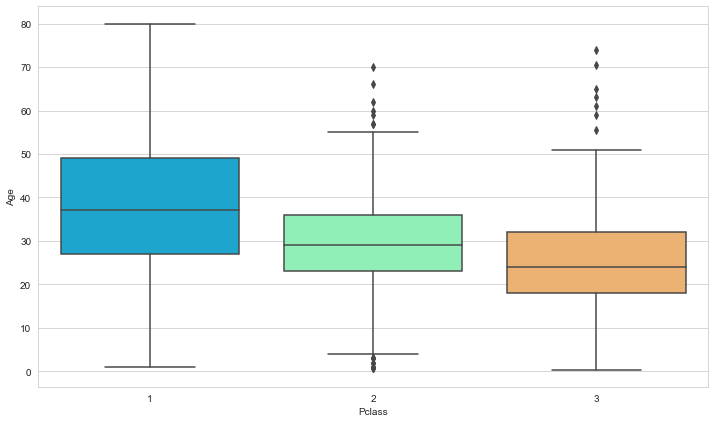

In [283]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Pclass', y='Age', data=titanic_train, palette='rainbow')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [284]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24;
    else:
        return Age

In [285]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(input_age,axis=1)

Now let's check the heatmap for null values 

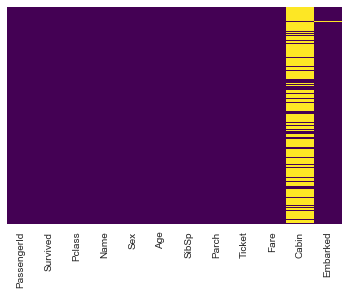

In [286]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Drop Cabin Column from dataset

In [287]:
titanic_train.drop('Cabin', inplace=True, axis = 1)

Check new dataset

In [288]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [289]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [290]:
sex = pd.get_dummies(titanic_train['Sex'], drop_first = True)
embarked = pd.get_dummies(titanic_train['Embarked'], drop_first = True)

Drop all irrelevant columns since we already converted sex and embarked to dummy variables, we no longer need the columns

In [291]:
titanic_train.drop(['Sex','Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [292]:
titanic_train = pd.concat([titanic_train, sex, embarked], axis = 1)

In [293]:
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


We already have the test data in another folder so we will not be needing the train test split. 
### Lets do the EDA for the test data

In [294]:
titanic_test = pd.read_csv('titanic_test.csv')

In [295]:
titanic_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [296]:
titanic_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [297]:
titanic_test.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q


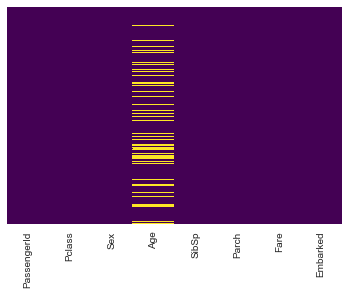

In [298]:
sns.heatmap(titanic_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

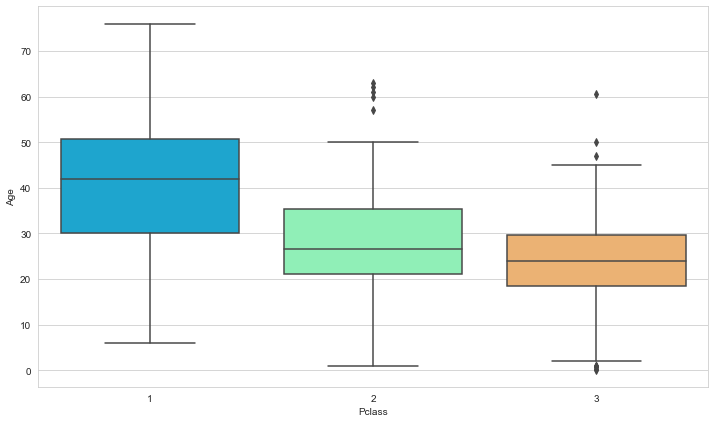

In [299]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Pclass', y='Age', data=titanic_test, palette='rainbow')

In [300]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24;
    else:
        return Age

In [301]:
titanic_test['Age'] = titanic_train[['Age','Pclass']].apply(input_age,axis=1)

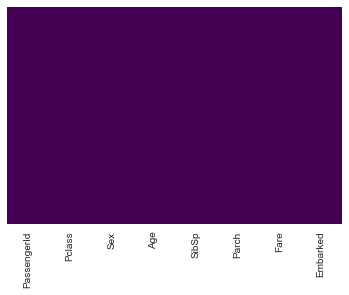

In [302]:
sns.heatmap(titanic_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [303]:
sex = pd.get_dummies(titanic_test['Sex'], drop_first = True)
embarked = pd.get_dummies(titanic_test['Embarked'], drop_first = True)

In [304]:
titanic_test.drop(['Sex','Embarked'], axis=1, inplace=True)

In [305]:
titanic_test = pd.concat([titanic_test, sex, embarked], axis = 1)

In [306]:
titanic_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,22.0,0,0,7.8292,1,1,0
1,893,3,38.0,1,0,7.0000,0,0,1
2,894,2,26.0,0,0,9.6875,1,1,0
3,895,3,35.0,0,0,8.6625,1,0,1
4,896,3,35.0,1,1,12.2875,0,0,1


Let's concat both datasets to get a full data set 

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [307]:
##import train_test_split
from sklearn.model_selection import train_test_split

In [308]:
X = titanic_train.drop('Survived', axis = 'columns')

In [309]:
y = titanic_train['Survived']

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

## CREATING AND TRAINING THE MODEL

In [314]:
from sklearn.linear_model import LogisticRegression

#assigned LnearRegression class to a variable lm
logmodel= LogisticRegression(max_iter=500)

In [315]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [316]:
predictions = logmodel.predict(X_test)

In [317]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

## Evaluation

In [318]:
from sklearn.metrics import classification_report

In [319]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

## Great Job!